# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(iris['data'], columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])
df['target'] = iris['target']
df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.target.unique()
# 0 - Iris Setosa
# 1 - Iris Versicolour
# 2 - Iris Virginica

array([0, 1, 2])

## Trying logistic regression for one feature and one output class

In [5]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [6]:
X.shape, y.shape

((150, 1), (150,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.classes_, log_reg.coef_[0][0], log_reg.intercept_[0]

(array([0, 1]), 3.748338589074451, -6.2748441893787605)

In [10]:
y_proba = log_reg.predict_proba(X_test)
y_test_pred = log_reg.predict(X_test)

print('Feature values : \n', X_test[:5])
print('Predicted probabilities : \n', y_proba[:5])
print('Predicted class : ', y_test_pred[:5])
print('Actual class : ', y_test[:5])

print('Mean accuracy : ', log_reg.score(X_test, y_test))

Feature values : 
 [[1.8]
 [1.5]
 [0.3]
 [1.5]
 [1.7]]
Predicted probabilities : 
 [[0.38410388 0.61589612]
 [0.65753675 0.34246325]
 [0.994236   0.005764  ]
 [0.65753675 0.34246325]
 [0.47568634 0.52431366]]
Predicted class :  [1 0 0 0 1]
Actual class :  [1 0 0 0 1]
Mean accuracy :  0.92


Confirming that it works like I thought ...

$$\hat{p} = h_{\theta}(X) = \sigma(X^T \theta)$$

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

sigmoid(X_test[:5] * log_reg.coef_[0][0] + log_reg.intercept_[0])

array([[0.61589612],
       [0.34246325],
       [0.005764  ],
       [0.34246325],
       [0.52431366]])

## Trying logistic regression for two feature and one output class

In [12]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [13]:
X.shape, y.shape

((150, 2), (150,))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
log_reg.classes_, log_reg.coef_, log_reg.intercept_

(array([0, 1]), array([[2.44002262, 2.05416377]]), array([-15.38767542]))

In [17]:
y_proba = log_reg.predict_proba(X_test)
y_test_pred = log_reg.predict(X_test)

print('Feature values : \n', X_test[:5])
print('Predicted probabilities : \n', y_proba[:5])
print('Predicted class : ', y_test_pred[:5])
print('Actual class : ', y_test[:5])

print('Mean accuracy : ', log_reg.score(X_test, y_test))

Feature values : 
 [[5.1 1.8]
 [4.5 1.5]
 [1.3 0.3]
 [4.5 1.5]
 [4.5 1.7]]
Predicted probabilities : 
 [[3.19964553e-01 6.80035447e-01]
 [7.90232593e-01 2.09767407e-01]
 [9.99990828e-01 9.17153348e-06]
 [7.90232593e-01 2.09767407e-01]
 [7.14123341e-01 2.85876659e-01]]
Predicted class :  [1 0 0 0 0]
Actual class :  [1 0 0 0 1]
Mean accuracy :  0.92


In [18]:
X_train = np.c_[np.ones(100), X_train]
X_train.shape

(100, 3)

![alt text](images/cross-entropy-loss-and-gradient.png "Cross entropy loss and it's gradient")

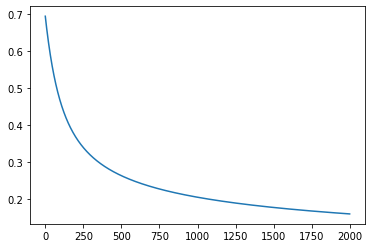

In [19]:
eta = 0.1 # learning rate (try different values like 0.02 and 0.5)
n_iterations = 2000 # use 10 for drawing the lines
m = len(X_train)
n = len(X_train[0])

theta = np.zeros((n,1)) # zero initialization
cost_list = []
for iteration in range(n_iterations):

    cost = 0
    for i in range(m):
        cost += (y_train[i]*np.log(sigmoid(X_train[i:i+1].dot(theta))) 
                + (1-y_train[i])*np.log(1 - sigmoid(X_train[i:i+1].dot(theta))))
    cost *= (-1/m)
    cost_list.append(cost[0][0])

    gradient = np.zeros((n,1))
    for j in range(n):
        for i in range(m):
            gradient[j] += ((sigmoid(X_train[i:i+1].dot(theta)) - y_train[i]) * X_train[i][j])[0][0]
        gradient[j] *= (1/m)
    # print(gradient)

    theta -= eta * gradient

plt.plot(range(len(cost_list)), cost_list)

In [20]:
theta

array([[-7.00808977],
       [ 0.14716185],
       [ 3.8609926 ]])

In [21]:
X_test = np.c_[np.ones(50), X_test]
y_test_pred =  (sigmoid(X_test.dot(theta)) > 0.5).astype(np.int)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[30  2]
 [ 1 17]]
0.94


## Trying logistic regression for multiple feature and multiple output classes

In [23]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [26]:
log_reg.classes_, log_reg.coef_, log_reg.intercept_

(array([0, 1, 2]),
 array([[-2.40219327, -1.01564328],
        [ 0.68748178, -1.11092713],
        [ 2.44002262,  2.05416377]]),
 array([  7.28478626,  -2.02120688, -15.38767542]))

In [27]:
y_test_pred = log_reg.predict(X_test)
log_reg.predict_proba(X_test)[:5]

array([[1.06004201e-03, 3.54504463e-01, 6.44435495e-01],
       [1.11522009e-02, 6.22043878e-01, 3.66803921e-01],
       [8.38687078e-01, 1.61305068e-01, 7.85455021e-06],
       [1.11522009e-02, 6.22043878e-01, 3.66803921e-01],
       [8.71946533e-03, 5.12967606e-01, 4.78312928e-01]])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 17]]
0.94


## Checking single class vs multiclass model working

In [29]:
# https://stackoverflow.com/q/29831489/4542098
y_categ = np.zeros((y.size, y.max()+1))
y_categ[np.arange(y.size),y] = 1
y_categ

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [30]:
X_train, X_test, y_categ_train, y_categ_test = train_test_split(X, y_categ, test_size=0.33, random_state=7)

In [31]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train, y_categ_train[:, 0])
y_categ_test_pred1 = log_reg1.predict(X_test)
print(confusion_matrix(y_categ_test[:, 0], y_categ_test_pred1))
print(accuracy_score(y_categ_test[:, 0], y_categ_test_pred1))

[[36  0]
 [ 0 14]]
1.0


In [32]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train, y_categ_train[:, 1])
y_categ_test_pred2 = log_reg2.predict(X_test)
print(confusion_matrix(y_categ_test[:, 1], y_categ_test_pred2))
print(accuracy_score(y_categ_test[:, 1], y_categ_test_pred2))

[[31  1]
 [18  0]]
0.62


In [33]:
log_reg3 = LogisticRegression()
log_reg3.fit(X_train, y_categ_train[:, 2])
y_categ_test_pred3 = log_reg3.predict(X_test)
print(confusion_matrix(y_categ_test[:, 2], y_categ_test_pred3))
print(accuracy_score(y_categ_test[:, 2], y_categ_test_pred3))

[[30  2]
 [ 2 16]]
0.92


In [34]:
print(log_reg1.coef_, log_reg1.intercept_)
print(log_reg2.coef_, log_reg2.intercept_)
print(log_reg3.coef_, log_reg3.intercept_)

[[-2.40219327 -1.01564328]] [7.28478626]
[[ 0.68748178 -1.11092713]] [-2.02120688]
[[2.44002262 2.05416377]] [-15.38767542]


In [39]:
scores = np.c_[X_test.dot(log_reg1.coef_.T) + log_reg1.intercept_, 
    X_test.dot(log_reg2.coef_.T) + log_reg2.intercept_,
    X_test.dot(log_reg3.coef_.T) + log_reg3.intercept_]
scores

array([[ -6.79455732,  -0.51471862,   0.75393471],
       [ -5.04854838,  -0.59392955,  -1.32632799],
       [  3.85724203,  -1.4607587 , -11.59939689],
       [ -5.04854838,  -0.59392955,  -1.32632799],
       [ -5.25167703,  -0.81611498,  -0.91549524],
       [  3.85724203,  -1.4607587 , -11.59939689],
       [ -6.00942569,  -0.31893684,  -0.35031894],
       [ -4.12476174,  -0.57798866,  -2.46916753],
       [  3.23814837,  -1.14342145, -11.07280648],
       [ -5.04854838,  -0.59392955,  -1.32632799],
       [ -6.45277367,  -0.47237408,   0.30451607],
       [ -5.15011271,  -0.70502226,  -1.12091162],
       [  3.57993203,  -1.10107692, -11.52222512],
       [ -9.90770089,  -0.60488583,   4.63187196],
       [  3.71858703,  -1.28091781, -11.560811  ],
       [ -6.07389934,  -0.72096315,   0.02192792],
       [ -8.47609261,  -0.03348137,   2.46195054],
       [ -7.75543463,  -0.2397259 ,   1.72994376],
       [  3.23814837,  -1.14342145, -11.07280648],
       [  3.82015135,  -1.16982

In [36]:
from scipy.special import softmax
probs = softmax(scores, axis=1)
probs[:5]

array([[4.11085968e-04, 2.19397639e-01, 7.80191275e-01],
       [7.78940723e-03, 6.70070942e-01, 3.22139650e-01],
       [9.95121180e-01, 4.87862682e-03, 1.92815961e-07],
       [7.78940723e-03, 6.70070942e-01, 3.22139650e-01],
       [6.17990590e-03, 5.21581271e-01, 4.72238823e-01]])

In [37]:
combined = np.argmax(probs, axis=1)
combined

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 1, 1, 2, 0], dtype=int64)

In [38]:
y_test_pred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 1, 1, 2, 0])